# Alkali Opacities Tutorial
This tutorial shows how to create Alkali opacity objects and compute their extinction coefficient spectra for a given atmospheric profile.
Lets start by importing some necessary modules:

In [1]:
import pyratbay.atmosphere as pa
import pyratbay.constants as pc
import pyratbay.opacity as op
import pyratbay.spectrum as ps

import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### Preamble
We will sample the models over a wavelength array and over an atmospheric profile. Lets create these first:


Compute TEA thermochemical-equilibrium abundances profile.

Compute chemical abundances.


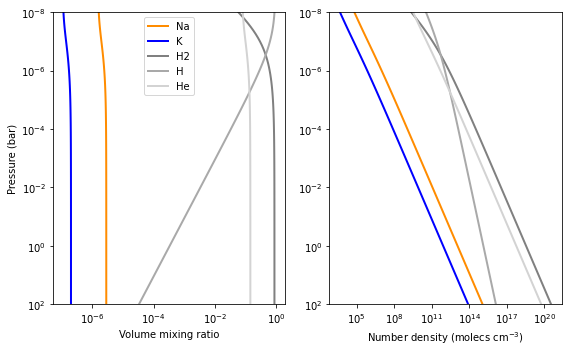

In [2]:
# We will sample the opacity over a constant-resolution wavelength array
# (values have micron units)
wl_min = 0.5
wl_max = 1.0
resolution = 30000.0
wl = ps.constant_resolution_spectrum(wl_min, wl_max, resolution)



# For the atmoshere, consider a simple solar-abundance isothermal atmosphere
nlayers = 81
pressure = pa.pressure('1e-8 bar', '1e2 bar', nlayers)
temperature = np.tile(1800.0, nlayers)
species = ['Na', 'K', 'H2', 'H', 'He']

# Volume mixing ratios in thermochemical equilibrium
vmr = pa.abundance(pressure, temperature, species)
# Number-density profiles under IGL (molecules per cm3)
number_densities = pa.ideal_gas_density(vmr, pressure, temperature)

Na_number_density = number_densities[:,0]
K_number_density = number_densities[:,1]


# Show profiles:
cols = ['darkorange', 'blue', 'gray', 'darkgray', 'lightgray']
plt.figure(1, (8,5))
plt.clf()
ax = plt.subplot(121)
for i, spec in enumerate(species):
    ax.plot(vmr[:,i], pressure/pc.bar, color=cols[i], lw=2.0, label=spec)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(100, 1e-8)
ax.set_xlabel('Volume mixing ratio')
ax.set_ylabel('Pressure (bar)')
ax.legend(loc='best')

ax = plt.subplot(122)
for i, spec in enumerate(species):
    ax.plot(number_densities[:,i], pressure/pc.bar, color=cols[i], lw=2.0, label=spec)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(100, 1e-8)
ax.set_xlabel('Number density (molecs cm$^{-3}$)')
plt.tight_layout()

### A Sodium opacity model

In [3]:
# Initialize a Na model: arguments are pressure and wavenumner (CGS units)
sodium = op.alkali.SodiumVdW(pressure, 1e4/wl)

# A print() call shows some useful info about the object
print(sodium)

Model name (name): 'sodium_vdw'
Model species (mol): Na
Species mass (mass, amu): 22.989769
Profile hard cutoff from line center (cutoff, cm-1): 4500.0
Detuning parameter (detuning): 30.0
Lorentz-width parameter (lpar): 0.071
Partition function (Z): 2.0
Wavenumber  Wavelength          gf   Lower-state energy
      cm-1          um               cm-1
      (wn)                    (gf)   (elow)
  16960.87    0.589592   6.546e-01   0.000e+00
  16978.07    0.588995   1.309e+00   0.000e+00
Wavenumber (wn, cm-1):
   [20000.00 19999.33 19998.67 ... 10000.81 10000.47 10000.14]
Pressure (pressure, barye):
[1.000e-02 1.334e-02 1.778e-02 2.371e-02 3.162e-02 4.217e-02 5.623e-02
 7.499e-02 1.000e-01 1.334e-01 1.778e-01 2.371e-01 3.162e-01 4.217e-01
 5.623e-01 7.499e-01 1.000e+00 1.334e+00 1.778e+00 2.371e+00 3.162e+00
 4.217e+00 5.623e+00 7.499e+00 1.000e+01 1.334e+01 1.778e+01 2.371e+01
 3.162e+01 4.217e+01 5.623e+01 7.499e+01 1.000e+02 1.334e+02 1.778e+02
 2.371e+02 3.162e+02 4.217e+02 5.623e+02 

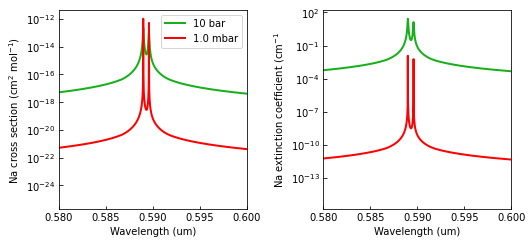

In [4]:
# Evaluate the opacity over atmospheric profile
Na_extinction = sodium.calc_extinction_coefficient(
    temperature, Na_number_density,
)


# Show the spectra at a couple of layers
fig = plt.figure(2)
fig.set_size_inches(7.5, 3.5)
plt.clf()
ax = plt.subplot(121)
ax.plot(wl, sodium.cross_section[72], color='xkcd:green', lw=2.0, label='10 bar')
ax.plot(wl, sodium.cross_section[40], color='red', lw=2.0, label='1.0 mbar')
ax.set_yscale('log')
ax.set_xlabel('Wavelength (um)')
ax.set_xlim(np.amin(wl), np.amax(wl))
ax.set_xlim(0.58, 0.60)
ax.tick_params(which='both', direction='in')
ax.set_ylabel('Na cross section (cm$^{2}$ mol$^{-1}$)')
ax.legend(loc='upper right')

ax = plt.subplot(122)
ax.plot(wl, Na_extinction[72], color='xkcd:green', lw=2.0)
ax.plot(wl, Na_extinction[40], color='red', lw=2.0)
ax.set_yscale('log')
ax.set_xlabel('Wavelength (um)')
ax.set_xlim(np.amin(wl), np.amax(wl))
ax.set_xlim(0.58, 0.60)
ax.tick_params(which='both', direction='in')
ax.set_ylabel('Na extinction coefficient (cm$^{-1}$')
plt.tight_layout()

### Sodium and Potassium models

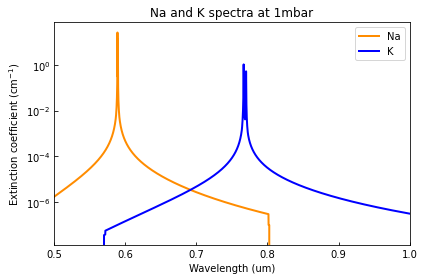

In [5]:
# Now compute K extinction coefficient
potassium = op.alkali.PotassiumVdW(pressure, 1e4/wl)

K_extinction = potassium.calc_extinction_coefficient(
    temperature, K_number_density,
)


# Plot along Na
fig = plt.figure(3)
plt.clf()
ax = plt.subplot(111)
ax.plot(wl, Na_extinction[72], color='darkorange', lw=2.0, label='Na')
ax.plot(wl, K_extinction[72], color='blue', lw=2.0, label='K')
ax.set_yscale('log')
ax.set_xlabel('Wavelength (um)')
ax.set_xlim(np.amin(wl), np.amax(wl))
ax.set_xlim(0.5, 1.0)
ax.tick_params(which='both', direction='in')
ax.set_ylabel('Extinction coefficient (cm$^{-1}$)')
ax.legend(loc='upper right')
ax.set_title('Na and K spectra at 1mbar')
plt.tight_layout()


Compute TEA thermochemical-equilibrium abundances profile.

Compute chemical abundances.


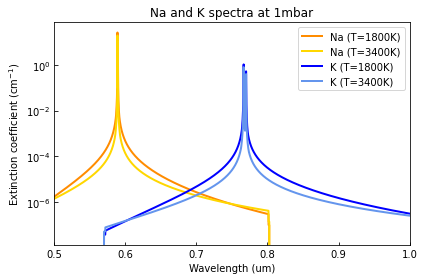

In [6]:
# To evaulate under new atmospheric conditions, simply call the
# extinction_coefficient() method with the new values:

# A hotter atmosphere
temp_hot = np.tile(3400.0, nlayers)
vmr_hot = pa.abundance(pressure, temp_hot, species)
density_hot = pa.ideal_gas_density(vmr_hot, pressure, temp_hot)
Na_density_hot = density_hot[:,0]
K_density_hot = density_hot[:,1]

# New opacities
Na_extinction_hot = sodium.calc_extinction_coefficient(
    temp_hot, Na_density_hot,
)
K_extinction_hot = potassium.calc_extinction_coefficient(
    temp_hot, K_density_hot,
)


# Plot Na and K opacities
fig = plt.figure(4)
plt.clf()
ax = plt.subplot(111)
ax.plot(wl, Na_extinction[72], color='darkorange', lw=2.0, label='Na (T=1800K)')
ax.plot(wl, Na_extinction_hot[72], color='gold', lw=2.0, label='Na (T=3400K)')
ax.plot(wl, K_extinction[72], color='blue', lw=2.0, label='K (T=1800K)')
ax.plot(wl, K_extinction_hot[72], color='cornflowerblue', lw=2.0, label='K (T=3400K)')
ax.set_yscale('log')
ax.set_xlabel('Wavelength (um)')
ax.set_xlim(np.amin(wl), np.amax(wl))
ax.set_xlim(0.5, 1.0)
ax.tick_params(which='both', direction='in')
ax.set_ylabel('Extinction coefficient (cm$^{-1}$)')
ax.legend(loc='upper right')
ax.set_title('Na and K spectra at 1mbar')
plt.tight_layout()